In [5]:
#In this project we use two datasets; one on covid-19 India analysis and the other with Statewise effect and vaccinations.

import pandas as pd #to manpulate data
import numpy as np #for numbers
import matplotlib.pyplot as plt #for plotting
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [6]:
covid_df = pd.read_csv("C:/Users/Fatim/Desktop/covid-19/using/covid_19_india.csv") #read csv because the file is in csv(excel) format


In [7]:
covid_df.head(4) #reads first 4 rows of info

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,11-08-2021,6:00 PM,Kerala,1,0,0,0,1
1,2,11-08-2021,6:00 PM,Kerala,1,0,0,0,1
2,3,11-08-2021,6:00 PM,Kerala,2,0,0,0,2
3,4,11-08-2021,6:00 PM,Kerala,3,0,0,0,3


In [8]:
covid_df.info() #to get an idea about the data present 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [9]:
covid_df.describe() #for the statistical idea

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [10]:
 vaccine_df = pd.read_csv("C:/Users/Fatim/Desktop/covid-19/using/covid_vaccine_statewise.csv")

In [11]:
vaccine_df.head(3)


,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0


In [12]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True, axis = 1)

In [13]:
# to find the total no. of Active cases

covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail(5) #last 5 rows

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_cases
18105,03-02-2020,Telangana,638410,3831,650353,8112
18106,02-02-2020,Tripura,77811,773,80660,2076
18107,01-02-2020,Uttarakhand,334650,7368,342462,444
18108,31-01-2020,Uttar Pradesh,1685492,22775,1708812,545
18109,30-01-2020,West Bengal,1506532,18252,1534999,10215


In [14]:
# creating a pivot table
statewise = pd.pivot_table(covid_df, values = ["Confirmed","Deaths","Cured"], 
                           index= "State/UnionTerritory",aggfunc = max)

In [15]:
#recovery rate
statewise["RecoveryRate"] = statewise["Cured"] * 100 / statewise["Confirmed"]

In [16]:
#mortality rate
statewise["MortalityRate"] = statewise["Deaths"] * 100 / statewise["Confirmed"]

In [17]:
#sorting the values of statewise in descending order wrt the confirmed cases values
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [18]:
#plotting the pivot table
#cmap for color maps found in matplotlib library
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,RecoveryRate,MortalityRate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [19]:
#top 10 states based on the no. of active cases

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'], ascending = False).reset_index()

In [20]:
fig = plt.figure(figsize = (16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

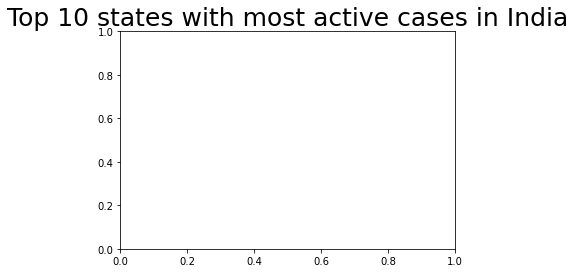

In [21]:
#giving a title to our plot
plt.title("Top 10 states with most active cases in India", size =25)

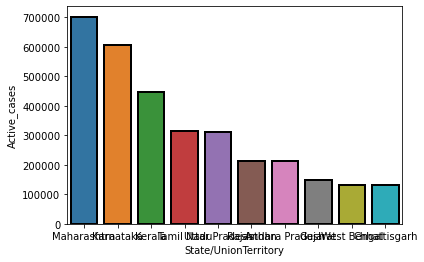

In [22]:
#setting the axes
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = "black")

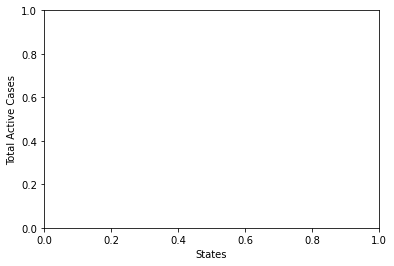

In [23]:
#since labels are congested, lets organize them
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

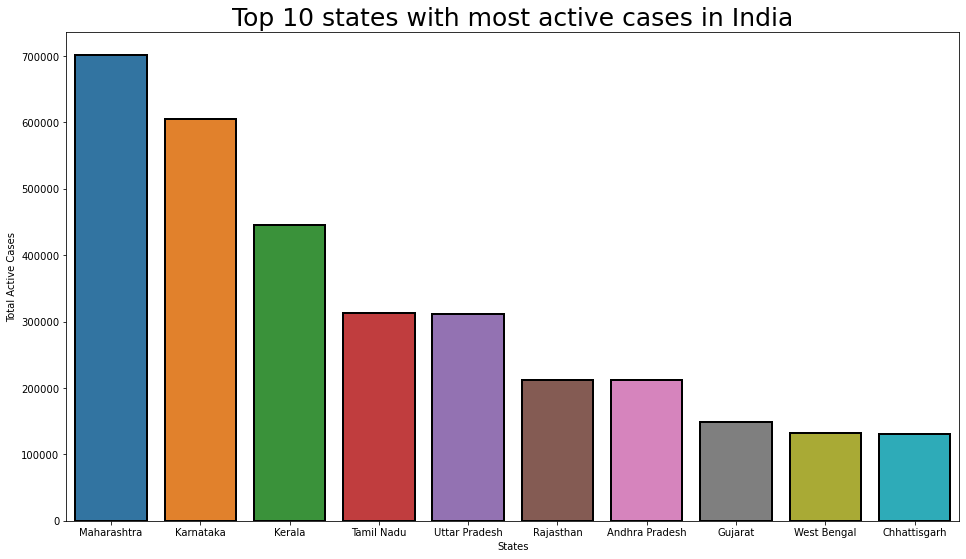

In [24]:
#top 10 states based on the no. of active cases
# bar plot
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_cases', 'Date']].sort_values(by = ['Active_cases'], ascending = False).reset_index()
fig = plt.figure(figsize = (16,9))
#giving a title to our plot
plt.title("Top 10 states with most active cases in India", size =25)
#setting the axes
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_cases", x = "State/UnionTerritory", linewidth = 2, edgecolor = "black")
#since labels are congested, lets organize them
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

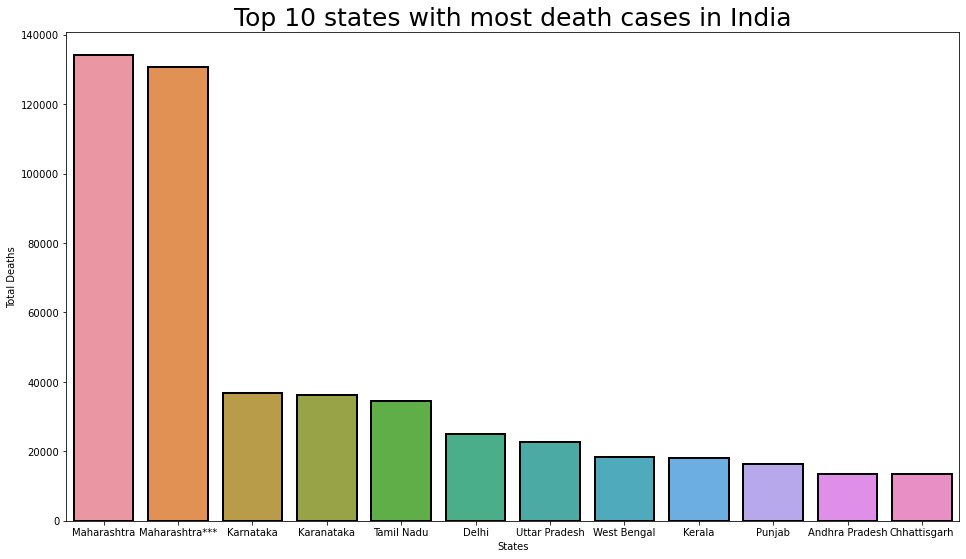

In [25]:
# top states wiht highest deaths
# bar plot
top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()
fig = plt.figure(figsize = (16,9))
#giving a title to our plot
plt.title("Top 10 states with most death cases in India", size =25)
#setting the axes
ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = "State/UnionTerritory", linewidth = 2, edgecolor = "black")
#since labels are congested, lets organize them
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.show()

In [26]:
import datetime

In [49]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'],format='%d-%m-%Y')

Text(0.5, 1.0, 'Top 5 affected states in India')

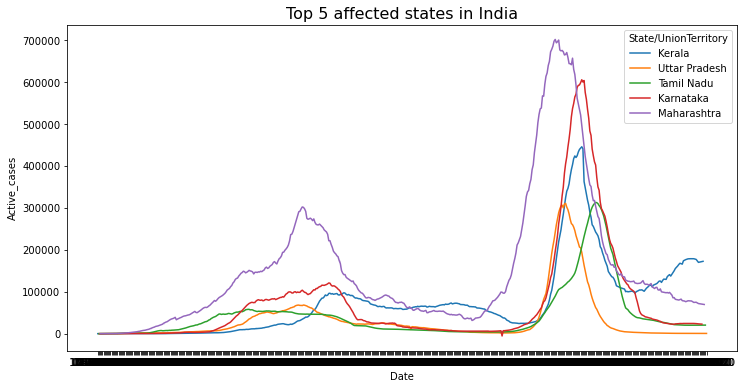

In [28]:
# line plot to see the growth trend of active cases sorted by confirmed cases

fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])],x = 'Date', y = 'Active_cases', hue = 'State/UnionTerritory')
#isin will include the states that we have mentioned
# hue will provide different colors to different states
ax.set_title("Top 5 affected states in India",size=16)


In [29]:
covid_df.dtypes

Date                    object
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
Active_cases             int64
dtype: object

In [30]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [31]:
#renaming "updated on" column

vaccine_df.rename(columns={"Updated On": "Vaccine_date"}, inplace = True)
vaccine_df.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [32]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [33]:
#sum of all the missing values in each column
vaccine_df.isnull().sum()

Vaccine_date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [34]:
#dropping a few missing value columns

vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)

In [35]:
vaccination.head()

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [37]:
#pie chart to see vaccination for male and female individuals
#male vs female vaccinations

male = vaccination["Male(Individuals Vaccinated)"].sum()
female = vaccination["Female(Individuals Vaccinated)"].sum()

#plotting the pie charts and giving names to the pies
px.pie(names=["Male", "Female"], values = [male, female], title = "Male v/s Female Vaccination")

In [39]:
#droping the rows where state is india

vaccine = vaccine_df[vaccine_df.State != 'India']
vaccine

,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#renaem the last column
vaccine.rename(columns = {"Total Individuals Vaccinated" : "Total"}, inplace = True)
vaccine.head()

C:\Users\Fatim\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccine_date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [41]:
#plot to find the state with most number of vaccinated individuals
max_vac = vaccine.groupby("State")["Total"].sum().to_frame("Total")
max_vac = max_vac.sort_values("Total" , ascending = False)[:5] #[:5] is for top 5 states
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


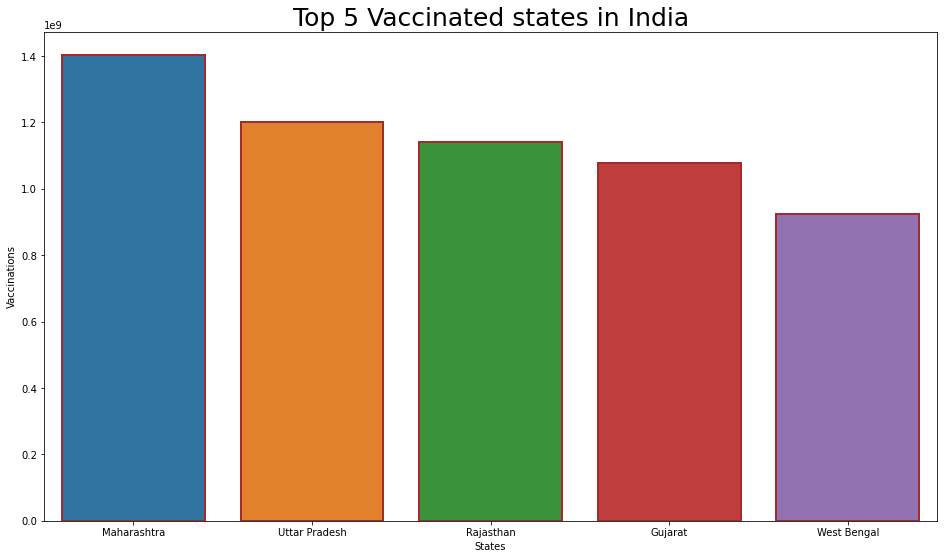

In [44]:
#using the above table and converting it into a chart
#bar plot
fig = plt.figure(figsize = (16,9))
#giving a title to our plot
plt.title("Top 5 States with MAX vaccinations in India", size =25)
#setting the axes
#sns --> created using seaborn lib
x = sns.barplot(data = max_vac.iloc[:12], y = max_vac.Total, x = max_vac.index, linewidth = 2, edgecolor = "brown")
#since labels are congested, lets organize them
plt.xlabel("States")
plt.ylabel("Vaccinations")
plt.show()


In [45]:
#plot to find the state with min number of vaccinated individuals
min_vac = vaccine.groupby("State")["Total"].sum().to_frame("Total")
min_vac = min_vac.sort_values("Total" , ascending = True)[:5] #[:5] is for top 5 states
min_vac

,Total
State,
Lakshadweep,2124715.0
Andaman and Nicobar Islands,8102125.0
Ladakh,9466289.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Sikkim,16136752.0


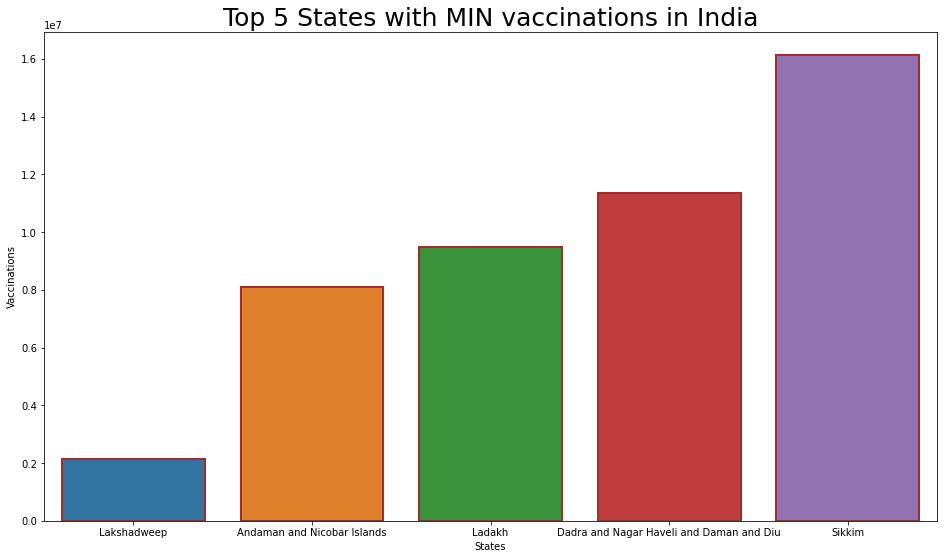

In [46]:
#using the above table and converting it into a chart
#bar plot
fig = plt.figure(figsize = (16,9))
#giving a title to our plot
plt.title("Top 5 States with MIN vaccinations in India", size =25)
#setting the axes
#sns --> created using seaborn lib
x = sns.barplot(data = min_vac.iloc[:12], y = min_vac.Total, x = min_vac.index, linewidth = 2, edgecolor = "brown")
#since labels are congested, lets organize them
plt.xlabel("States")
plt.ylabel("Vaccinations")
plt.show()